# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
#импортируем библиотеку pandas,импортирую библиотеку matplotlib для дальшейщей работы с графиками и гистраграмами
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#читаем csv файл,указываемз в качестве разделителя знак табуляции \t
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
#получаем информацию 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#вывожу превые 15 строк таблицы
print(data.head(15)) 

    total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00   

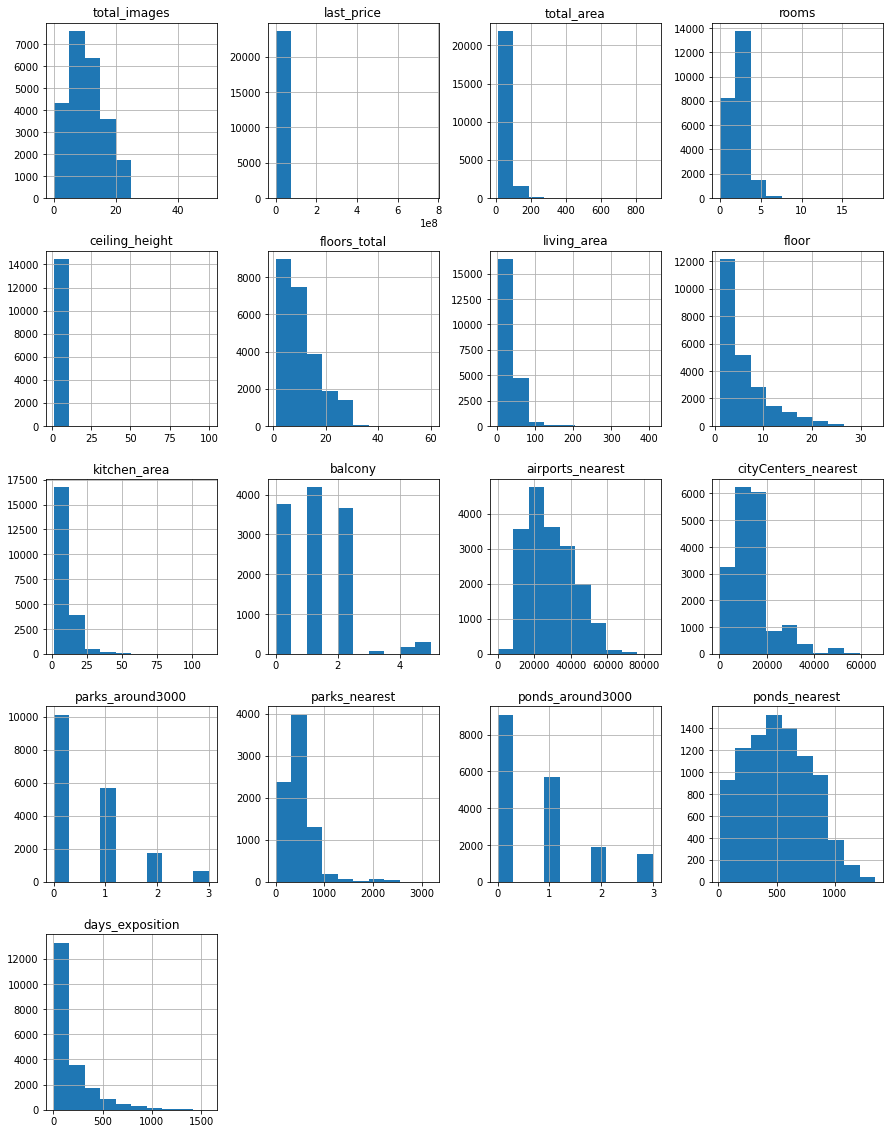

In [5]:
#строим гистаграмму для всех числовых столбцов таблицы
data.hist(figsize=(15,20)) 
plt.show()

# Вывод первого пункта

На первом этапе мы импортировали библиотеку pandas.Импортировали библиотеку matplotlib,т.к. она может пригодится нам для дальнейшей работы с графиками и диаграммами.Вывели общую информацию и первые 15 строк таблицы.

На графиках можно заметить:

1.Около 10 фотографий в среднем прикрепляют к объявлению

2. Общая площадь от 0 до 100 м2

3. Квартиры от 1-4 комнат.

4. В столбце высота потолков до 14м, возможно неправильно занесены данные или это аномалии.

5. Недвижимость естьв домах от 5 до 25 этажей.

6. Жилая площадаь около 50 м2.

7. Площадь кухни ло 14 м2

8. Квартиры находятся в разной удаленности от центра города, парка , водоема и аэропорта. 

Все предположения сделаны, преступим к обработке данных. 

### Выполните предобработку данных

Для работы с данными необходимо проверить пропускию

Выведу на экран все пропуски в таблице по каждому столбцу

In [6]:
#вывожу количество пропусков для каждого столбца
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Хочется привести к одному виду наименования некоторых столбцов.Приведу к форме "змеинного регистра".

In [7]:
#переименную названия нексольких столбцов
data=data.rename(columns={'cityCenters_nearest':'city_centers_nearest',
                          'parks_around3000':'parks_around_3000',
                          'ponds_around3000':'ponds_around_3000'})
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

В таблице у нас присутвуютс пропуски в 14 столбцах.

Обработаю пропуски в столбце balkony.Их можно заменить на 0,т.к. данные пропуск скорее всего образовался,потому что его не указывают в объявлении. Логично предположить,что балкона вовсе нет.

In [8]:
#пропуски в столбце балкон заменяю на 0
data['balcony'].fillna(0,inplace=True) 
print(data['balcony'].isna().sum())

0


 <div class="alert alert-success">
<h3> Комментарий ревьюера ✔️<a class="tocSkip"> </h3>

 Верно, пропуски могли быть там где балконы отсутствуют
</div>

In [9]:
data['is_apartment'].fillna(False, inplace=True)
# проверю наличие пропусков в столбце 
print(data['is_apartment'].isna().sum())

0


В столбце ceiling_height довольно-таки много пропусков. Возможно владельцы квартир не знают точной высоты пропусков или же данные пропуски технологические. 

Попробую заменить иx медианным значением.

In [10]:
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())

In [11]:

data['ceiling_height'].isna().sum()

0

Отлично,все пропуски заменены на медианное значение.

# Вывод по пропускам:
В нашей таблице пропуски обнаружены в 14 столбцах из 22.
Пропуски могли образоваться двумя способами:

Вызванные человеческим фактором. Кто-то не ввел нужную информацию.

Технологические. Возникают во время копирования, считывания или записи данных, изменения формата файла, выгрузки или интеграции из сторонней БД.

Для обработки пропусков необходимо понять, какие пропуски мы можем оставить и они не повлияют, а какие лучше поправить или же вовсе удалить.

1. Обработаю пропуски в столбцах ceiling_height,is_apartment,balcony, days_exposition.
Пропуски в толбце **balcony,is_apartment** и **days_exposition** заменяю на 0.

Пропуски в столбце **ceiling_height** заменяю на медианное значение

2. Пропуски в оставщихся столбцах трогать не буду,т.к. 

в столбце **floors_total** пропусков незначительное количество и они не повлияют.

в столбце **living_area** 1903 пропуска. Данные необходимы нам для измерений, пока не буду их заменять 

в столбце **kitchen_area** пропуски пока оставлю.Скорее всего данные не указывают, потому что не знают именно площадь кухни, но данные нам могут пригодиться. 

в столбце **locality_name** пропусков мало, на результат исследования они не должны влиять. Пока оставим пропуски, далее буду проверять на дубликаты данный столбец. 

в столбцах **airports_nearest,city_center_nearest, parks_around_3000,ponds_around_3000 и ponds_nearest** картографические данные, которые были подгруженны дополнительно. Тут может быть вывзваны пропуски автоматически, на этапе выгрузки или же вовсе их нет . Думаю, что эти пропуски не сильно будут мешать, пока оставлю, т.к не знаю, как их обработать. Возможно, их можно вообще удалить.



In [12]:
#поменяю тип данных в следующих столбцах к целочисленному типу,т.к содержатся целые числа
data['balcony']= data['balcony'].astype(int) 

In [13]:
data['last_price']= data['last_price'].astype(int)

In [14]:
data['total_images']= data['total_images'].astype('int')

In [15]:
# столбец с временем преобразую 
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


In [17]:
# поиск дубликатов
data.duplicated().sum()

0

Явных дубликатов нет, это хорошо. 

Проверю методом unique() наличие неявных дубликатов в наименованиях местоположения. 


Оставлю только наименования и выведу список уникальных значений в алфавитном порядке.


In [18]:
data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [19]:
data['locality_name']=data['locality_name'].str.lower()
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [20]:
data['locality_name']=(
    data['locality_name']
    .str.replace('ё','e')
    .replace(['поселок ','при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'городского типа ',
             'деревня ', 'городской посeлок ','посeлок ','коттеджный '], '', regex=True)
)
set(data['locality_name'].unique())

{'69-й километр',
 nan,
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'городской большая ижора',
 'городской янино-1',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпосeлок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зелeный бор',

In [21]:
data['locality_name'].isna().sum()

49

У нас после всех преобразования осталось 49 пропусков, считаю верным решением их отбросить.


In [22]:
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

# Вывод 
Вторым пунктом я преобразовала значения в некоторых столбцах на нужных тип данных:

Столбцы с количеством балконов, фотографий в объявлениях и общей стоимостью привела к целочисленному типу данных int

Столбец first_day_exposition содержит время, поэтому избавились об типа данных object

### Добавьте в таблицу новые столбцы

In [23]:
#создам новый столбец цена одного квадратного метра
data['price_per_square_meter']=(data['last_price']/data['total_area']).round(2)
data['price_per_square_meter'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_per_square_meter, dtype: float64

In [24]:
#нновый столбец день недели публикации
data['day_of_exposition']=data['first_day_exposition'].dt.weekday
data['day_of_exposition'].head()

0    3
1    1
2    3
3    4
4    1
Name: day_of_exposition, dtype: int64

In [25]:
#новый столбец месяц публикации 
data['month_of_exposition']=data['first_day_exposition'].dt.month
data['month_of_exposition'].head()

0     3
1    12
2     8
3     7
4     6
Name: month_of_exposition, dtype: int64

In [26]:
#год публикации 
data['year_of_exposition']=data['first_day_exposition'].dt.year
data['year_of_exposition'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_of_exposition, dtype: int64

In [27]:
#новый столбец тип этажа квартиры:первый,последний и другой 
#определяю функцию 
def floor(row):
    if row['floor'] == 1:
        return 'первый' 
    if row['floor'] == row['floors_total']:
        return'последний'
    else:
        return'другой'
data['category_floor']=data.apply(floor,axis=1)
data['category_floor'].head()

0    другой
1    первый
2    другой
3    другой
4    другой
Name: category_floor, dtype: object

In [28]:
#столбец расстояние до центра города в км
data['city_centers_nearest_kilometers']=(data['city_centers_nearest']/1000).round(0)
data['city_centers_nearest_kilometers']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: city_centers_nearest_kilometers, Length: 23650, dtype: float64

### Проведите исследовательский анализ данных

 <div class="alert alert-success">
<h3> Комментарий ревьюера ✔️<a class="tocSkip"> </h3>

Рекомендую оформлять проект заголовками и подписями. На данном этапе я не буду обращать внимание на этот момент, но в следующих проектах это уже будет требованием.
    
Пример кода:
    
    plt.title('Название заголовка')
    plt.ylabel('Название оси ординат')
    plt.xlabel('Название оси абсцисс')
    plt.show()
    
Для лучшего понимания работы с гистограммами оставляю ссылку [примеры гистограмм и оформления](https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/)
    
Ещё пара ссылок на полезные источники:
    
* [Как строить красивые графики на Python с Seaborn](https://habr.com/ru/companies/otus/articles/540526/)
    
* [Seaborn для визуализации данных в Python](https://pythonru.com/biblioteki/seaborn-plot)
    
Стоит сказать, что для описания типичных диапазонов значений часто применяют график боксплот, который отлично может дополнить следующий за этим комментарием этап. Также этот график позволяет оценить выбросы по каждому из столбцов.

In [29]:
#приступаю к изучению парметров
#общая площадь
data['total_area'].describe()


count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Построю гистаграмму от минимального значения 12 м2 и до 150 м2.

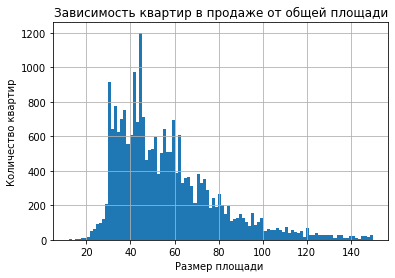

In [30]:
#построю гистаграмму 
data['total_area'].hist(bins=100, range=(12,150))
plt.title('Зависимость квартир в продаже от общей площади')
plt.ylabel('Количество квартир')
plt.xlabel('Размер площади ')
plt.show()


## Вывод

Я вижу, что больше всего значений около 45м2,значит объявления с такими квартирами больше. 

Объявлений о квартирах больше 82 м2 крайне мало,также и кв до 30 м2.

In [31]:
#изучаю жилую площадь 
data['living_area'].describe()

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Построю гистаграмму от минимального значения 2 м2 до 70 м2(т.к.выше мы определили, что крайне мало объявления с площадью около 70 м2 и более )

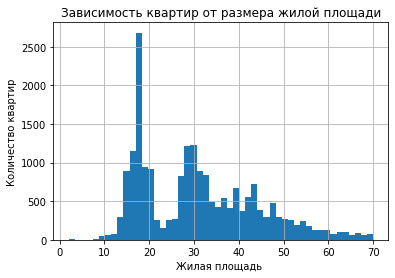

In [32]:
#построю гистаграмму 
data['living_area'].hist(bins=50,range=(2,70))
plt.title('Зависимость квартир от размера жилой площади')
plt.ylabel('Количество квартир')
plt.xlabel('Жилая площадь ')
plt.show()

Вывод:

я вижу, что больше всего объявлений квартир с жилой площадью 16-18 м2.Также на второе место уходят объявления квартир с жилой площадью 30м2. 

Визуально видно на графике,что практичиски нет объявления о продаже квартир с жилой площадью 23 м2.


In [33]:
#площадь кухни
data['kitchen_area'].describe()

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

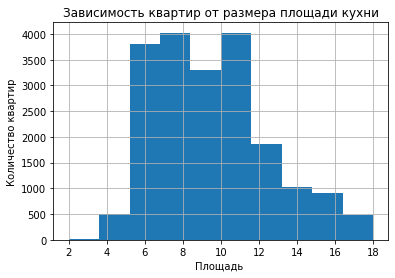

In [34]:
#для гистаграммы возьму в качестве мин. значения 2 м2 ,максимальное знач 18 м2
data['kitchen_area'].hist(bins=10,range=(2,18))
plt.title('Зависимость квартир от размера площади кухни')
plt.ylabel('Количество квартир')
plt.xlabel('Площадь ')
plt.show()

##### Вывод:

Больше всего объявления с площадью кухни 5.5 м2 и 8 м2. Также есть объявления с к площадью кухни 10-11 м2.


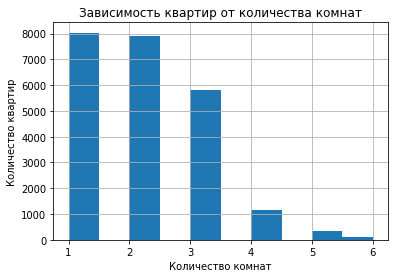

In [35]:
data['rooms'].hist(bins=10,range=(1,6))
plt.title('Зависимость квартир от количества комнат')
plt.ylabel('Количество квартир')
plt.xlabel('Количество комнат')
plt.show()

Вывод:

Почти одинаково кол-во объявления 1 и 2 команты, но однокомнаные квартиры прдают больше.


In [36]:
data['floor'].describe()

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

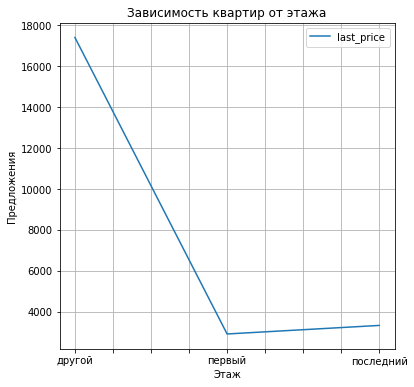

In [37]:
(
    data
   .pivot_table(index=['category_floor'],values=['last_price'],aggfunc='count')
   .plot(grid= True, figsize =(6,6))
)
plt.title('Зависимость квартир от этажа')
plt.ylabel('Предложения')
plt.xlabel('Этаж')
plt.show()

Вывод:

На последнем и первом меньше спрос. 


In [38]:
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [39]:
print('Максимальная стоимость:',data['last_price'].max())
print('Стоимость по медиане:',data['last_price'].median().round(2))

Максимальная стоимость: 763000000
Стоимость по медиане: 4650000.0


In [40]:
#сделаю срез 
data=data.query('last_price <= 10000000')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_exposition,month_of_exposition,year_of_exposition,category_floor,city_centers_nearest_kilometers
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.6,6,False,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,352.0,1.0,675.0,239.0,73717.95,4,8,2016,другой,34.0
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,первый,NaN


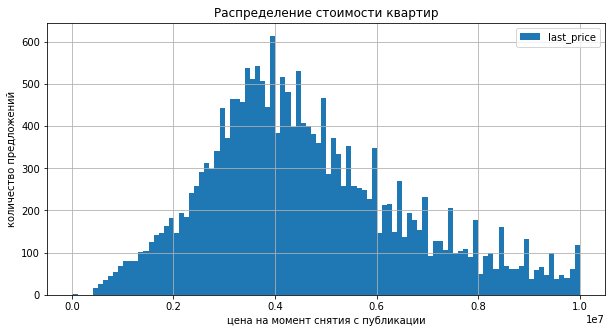

In [41]:
data.plot(kind='hist', y= 'last_price',grid=True, bins=100, figsize=(10,5))
plt.title('Распределение стоимости квартир')
plt.ylabel('количество предложений')
plt.xlabel('цена на момент снятия с публикации')
plt.show()

Вывод

По графику можно сделать вывод,что чаще больше всего квартир стоимотсью около 4 млн.

In [42]:
data['floor'].describe()

count    20937.000000
mean         5.865883
std          4.897602
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

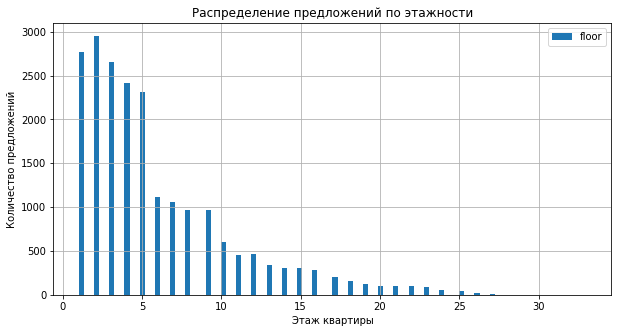

In [43]:
data.plot(kind='hist',y='floor',grid=True, bins=100, figsize=(10,5))
plt.title('Распределение предложений по этажности')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество предложений')
plt.show()

Вижу,что большенство предложений на 2 и 3 этаже. Крайне мало объявлений в райне 20- 25 этаже. Предполагаю, что квартиры чаще сдают в домах старых построек. 

Проверю распределение количества предложений по общему количеству этажей.

In [44]:
data['floors_total'].describe()


count    20867.000000
mean        10.730915
std          6.618813
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

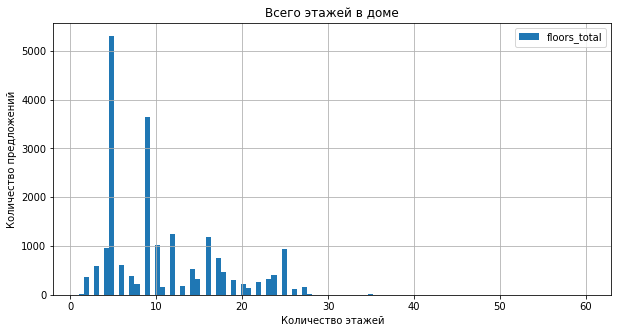

In [45]:
data.plot.hist(y='floors_total',grid=True, bins=100, figsize=(10,5))
plt.title('Всего этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество предложений')
plt.show()

Вывод

Больше всего квартир сдаются в малоэтажках до 5 этажей. Полагаю это старые дома ,т.е не новостройки, т.к. сейчас в основном новостройки от 15 этажей. 

In [46]:
data['city_centers_nearest'].describe()

count    15468.000000
mean     15217.611262
std       8548.934938
min        208.000000
25%      10868.750000
50%      13797.000000
75%      16804.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [47]:
data.query('city_centers_nearest > 6000 and city_centers_nearest < 22000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_exposition,month_of_exposition,year_of_exposition,category_floor,city_centers_nearest_kilometers
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
6,6,3700000,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000,71.6,2019-04-18,2,2.65,24.0,NaN,22,False,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,8,3300000,31.0,2017-04-29,1,2.55,9.0,18.0,6,False,...,140.0,1.0,317.0,193.0,106451.61,5,4,2017,другой,12.0
23687,6,3200000,39.0,2017-12-16,1,2.65,9.0,20.0,6,False,...,NaN,0.0,NaN,38.0,82051.28,5,12,2017,другой,17.0
23688,19,9200000,101.0,2019-04-01,3,3.05,15.0,63.0,12,False,...,NaN,0.0,NaN,23.0,91089.11,0,4,2019,другой,14.0
23689,13,3550000,35.3,2018-02-28,1,2.86,15.0,16.3,4,False,...,353.0,2.0,652.0,29.0,100566.57,2,2,2018,другой,16.0


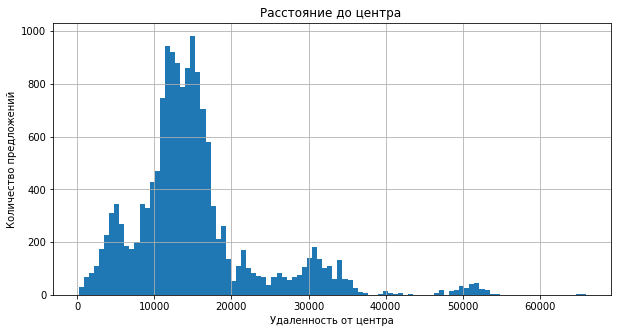

In [48]:
data.hist('city_centers_nearest', bins=100, figsize=(10,5));
plt.title('Расстояние до центра ')
plt.xlabel('Удаленность от центра')
plt.ylabel('Количество предложений')
plt.show()

Вывод:

Больше всего объявления в районе 14500 м от центра. На втором местре 16000 м. Третье место по удаленности от центра занимают объявления квартир в 13700 и 12000 м от центра.

In [49]:
data['parks_nearest'].describe()

count    6343.000000
mean      487.156235
std       322.867713
min         1.000000
25%       290.000000
50%       456.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

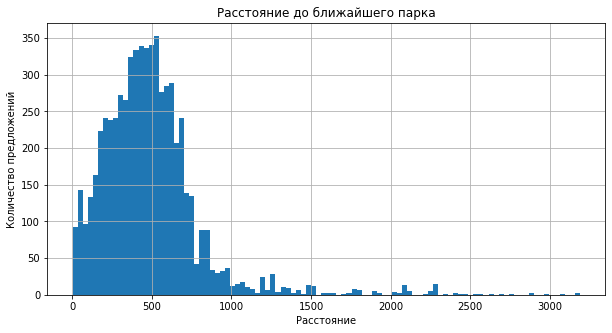

In [50]:
data.hist('parks_nearest', bins=100, figsize=(10,5))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние')
plt.ylabel('Количество предложений')
plt.show()

Большество объявлений о продаже квартир я наличием парка в 520 метрах,что вполне неплохо. На такие квартиры обращают бльше внимания, ведь есть где пройтись и погулять детям. 

In [51]:
data['ceiling_height'].describe()

count    20937.000000
mean         2.693631
std          0.794100
min          1.000000
25%          2.600000
50%          2.650000
75%          2.650000
max         32.000000
Name: ceiling_height, dtype: float64

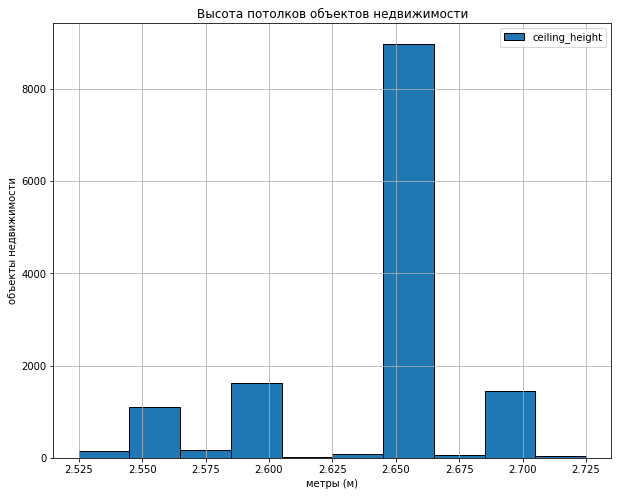

In [52]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['ceiling_height'].quantile(.25) # первый квартиль Q1
q3 = data['ceiling_height'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму высоты потолков
data['ceiling_height'].hist(bins=10, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Высота потолков объектов недвижимости')
plt.xlabel('метры (м)')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов недвижимости имеют высоту потолков  2,650 метров. 
Далее 2,6 м. Реже представлены варианты от 2,7м до 2,85 м. Среднее 2,7 м и медиана 2,65 точны.

Вывод:

Таким образом получается следующее представление о типичном объекте недвижимости из исходных данных:

квартира с 1 или 2 комнатами, в доме 5-ти или 9 ти этажей (с квартирой с 1 по 4 этаж),т.е скорее всего не новостройка. Общей площадью от 16 м2 до 30 м2 (в зависимости от количества комнат). Площадью кухни около 5,5 м², с высотой потолков 2,6 м, стоимостью около 3.5 млн.руб, расположенной на удалении от центра на расстоянии 12000-16000 метров, до ближайшего парка около 500 метров.

# 4.2 Изучу ,как быстро продавались квартиры

In [53]:
# изучу столбец
data['days_exposition'].describe()

count    18436.000000
mean       170.749349
std        208.325473
min          1.000000
25%         43.000000
50%         90.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение 170 дня. Хорошие квартиры бытсро продаются и снимаются, поэтому видим, что минимальное значение 1. 
Максимальное значение 1580 дней, крайне большая цифра, проверю на наличие выбросов,
но для начала построю диагармму распределения количества продаж по времени,т.е посмотрю, сколько висят объявления.

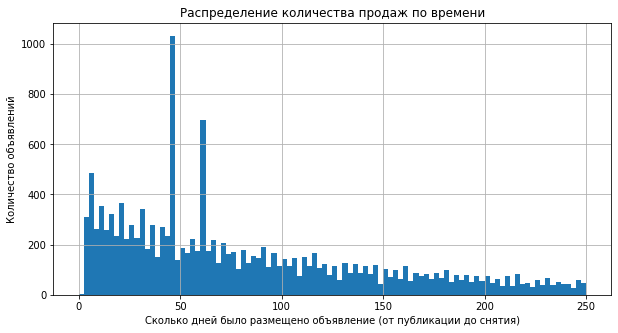

In [54]:
data.hist('days_exposition', bins=100,figsize=(10,5),range=(0,250))
plt.title('Распределение количества продаж по времени')
plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()

По диаграмме вижу,что зачастую объявления висят от 45 до 65 дней,это примерно 1-2 месяца.

Построю диаграмму размаха времени продаж недвижимости. 

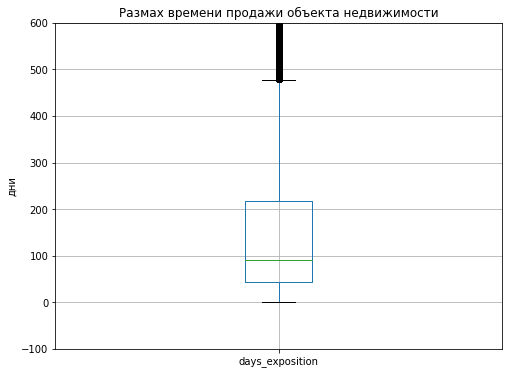

In [55]:
data.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи объекта недвижимости')
plt.ylim(-100, 600)
plt.ylabel('дни')
plt.show()

Получается, данные , которые выше 480 можно считать выбросами. 

Для того, чтобы проверить как влияют площади, количесво этажей в доме и дата размещения на стоимость, посмтрою сводную таблицу с необходимыми данными  и проверю коэффициент корреляции. 

In [56]:
#выведу на экран коэффицент корреляции между стоимостью и общей площаждью недвижимости
print('Корреляция:')
print(data['last_price'].corr(data['total_area']).round(2))

Корреляция:
0.66


Корреляция 0.67. Корреляция близка к 1,значит с ростом одной единицы растет вторая. 

Соответсвенно, чем больше общая площадь квартиры, тем больше конечная стоимость.  


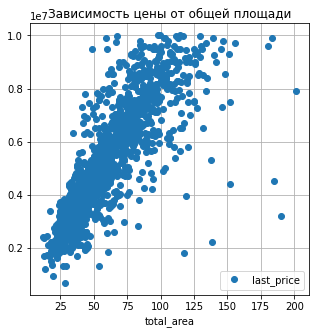

In [57]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от общей площади')
plt.show()

In [58]:
print('Корреляция:')
print(data['last_price'].corr(data['living_area']).round(2))

Корреляция:
0.55


Коэффициент корреляции тоже близок к 1. Значит с ростом жилой площади, растет цена.

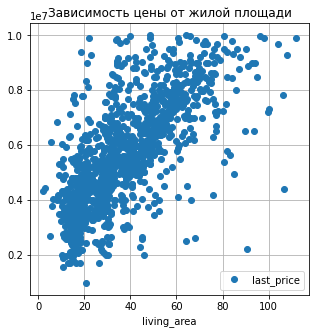

In [59]:
(
    data.pivot_table(index='living_area',values='last_price')
    .plot(grid=True,style='o',figsize=(5,5))
)
plt.title('Зависимость цены от жилой площади')

plt.show()


In [60]:
print('Корреляция:')
print(data['last_price'].corr(data['kitchen_area']).round(2))

Корреляция:
0.44


Коэффициент корреляция 0.44. Умеренный коэффициент корреляции, поэтому пприсутсвует зависимость между конечной ценой и площадью кухни.
Прострою диаграмму рассеивания, чтобы убедиться в этом. 

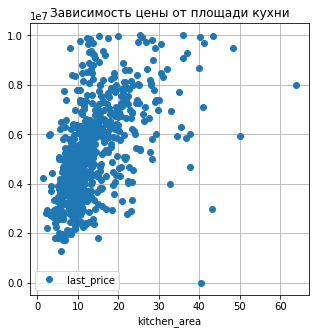

In [61]:
(
    data.pivot_table(index='kitchen_area',values='last_price')
    .plot(grid=True,style='o',figsize=(5,5))
)
plt.title('Зависимость цены от площади кухни')
plt.show()

            last_price
last_price         1.0 



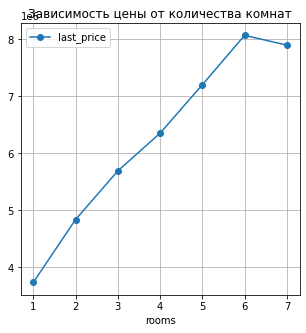

In [62]:
(
    data.query('rooms > 0 and rooms <9').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
print(data.query('rooms > 0 and rooms <9').pivot_table(index='floor', values=['last_price']).corr(),'\n')
plt.title('Зависимость цены от количества комнат')
plt.show()

На график отлична видно, что с увеличением количества комнат в кварире, увеличивается стоимость недвижимости. 

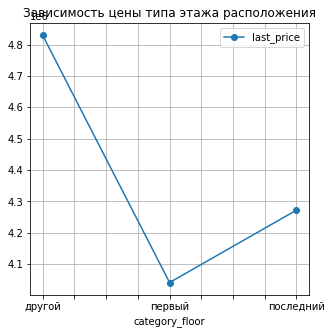

In [63]:
(
    data.pivot_table(index='category_floor', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены типа этажа расположения')
plt.show()

По графику можно сделать вывод,что есть зависимость этажа и стоимости недвижимости. В среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

<AxesSubplot:xlabel='day_of_exposition', ylabel='last_price'>

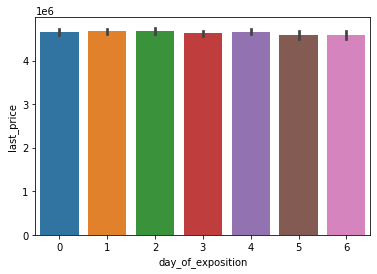

In [64]:
#import seaborn as sns
sns.barplot(data=data, x="day_of_exposition", y="last_price")

#(
    #data.pivot_table(index='day_of_exposition', values='last_price')
    #.plot(grid=True, style='o-', figsize=(5, 5))
#)
#plt.title('Зависимость цены от дня публикации')
#plt.show()


<AxesSubplot:xlabel='month_of_exposition', ylabel='last_price'>

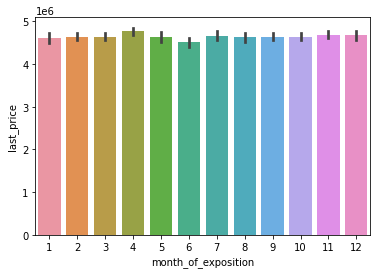

In [65]:
#import seaborn as sns
sns.barplot(data=data, x="month_of_exposition", y="last_price")
#(
    #data.pivot_table(index='year_of_exposition',values='last_price')
    #.plot(grid=True,style='o',figsize=(5,5))
#)
#plt.title('Зависимость цены от года размещения')
#plt.show()

<AxesSubplot:xlabel='year_of_exposition', ylabel='last_price'>

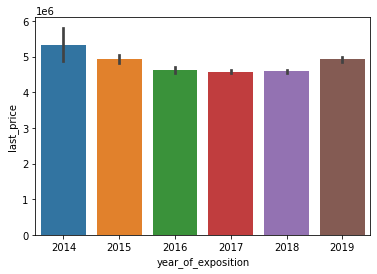

In [66]:
#import seaborn as sns
sns.barplot(data=data, x="year_of_exposition", y="last_price")

Между стоимостью квартиры и днем недели, месяцем или годом размещения объявления отсутствует линейная связь.

Могу сделать вывод,что на стоимость недвижимости в основном влияет площадь жилого помещения и общая площадь. 

Также не мало важна при покупке квартиры планировка (т.к количество комнат).Квартиры с 3 комнатами стоят больше 6 млн, квартиры с 1 комнатой от 4.2 млн. Соответсвенно,чем больше комнат, тем выше стоимость самой квратиры. Оно и понятно, ведь коэффициент корреляци между количеством комнат и общей площадью почти 1. Прослеживается И  влияения площади кухни на конечную стоимость, ведь это все-таки тоже площадь .  

Между стоимостью квартиры и днем недели, месяцем или годом размещения объявления отсутствует линейная связь.

Таким образом, на конечную стоимость влияет площадь. 



In [67]:
spb_data=data.query('locality_name =="санкт-петербург"')
spb_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_exposition,month_of_exposition,year_of_exposition,category_floor,city_centers_nearest_kilometers
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
7,5,7915000,71.6,2019-04-18,2,2.65,24.0,NaN,22,False,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0
10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,14.0


In [68]:
spb_data['city_centers_nearest_km']=data['city_centers_nearest_kilometers']
spb_data['city_centers_nearest_km'].describe()

/tmp/ipykernel_122/3810276177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_data['city_centers_nearest_km']=data['city_centers_nearest_kilometers']


count    13073.000000
mean        12.408705
std          4.518740
min          0.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         29.000000
Name: city_centers_nearest_km, dtype: float64

 Среднее значение 12 км.

In [69]:
#найду среднюю стоимость за м2
mean_cost_per_km = spb_data['last_price'].sum()/spb_data['city_centers_nearest_km'].sum()
print(f'Средняя цена для каждого километра составляет {mean_cost_per_km:.0f} руб.')

Средняя цена для каждого километра составляет 437295 руб.


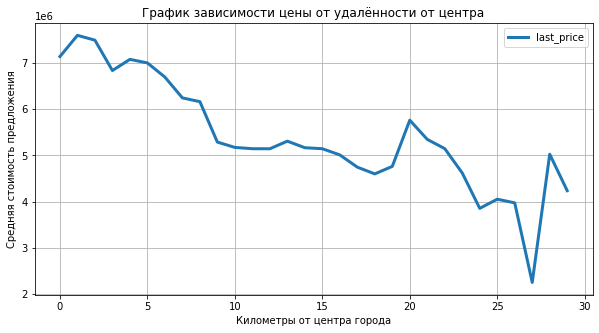

In [70]:
spb_data.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean') \
   .plot(figsize=(10,5), grid=True, linewidth=3)
plt.title('График зависимости цены от удалённости от центра')
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость предложения')
plt.show()


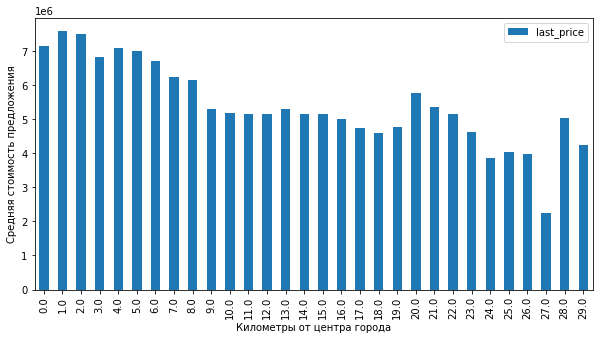

In [71]:
spb_data.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean') \
   .plot(kind='bar', figsize=(10,5))
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость предложения')
plt.show()

Вывод:

На диаграмме можно проследить, что стоимость зависить от удаленности от центра. Чем дальше от центра недвижимость, тем меньше у нее стоимость. Также можно заметить, что на 6-8 км удаленности от центра резко идет изменение стоимости. Можно предположить, районы, где квартиры находятся за пределами 8 км от центра уже не являются центральным.

In [72]:
top_10 = data.pivot_table(index='locality_name', values='first_day_exposition', aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
top_10.columns=['number_of_ads']
top_10.reset_index()

,locality_name,number_of_ads
0,санкт-петербург,13108
1,мурино,590
2,кудрово,468
3,шушары,437
4,всеволожск,394
5,колпино,336
6,пушкин,331
7,парголово,327
8,гатчина,305
9,выборг,236


In [73]:
top_10['cost_per_meter_mean'] = (data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc='mean').round(0))
top_10.head(10)

,number_of_ads,cost_per_meter_mean
locality_name,,
санкт-петербург,13108,104341.0
мурино,590,86088.0
кудрово,468,95053.0
шушары,437,78610.0
всеволожск,394,66820.0
колпино,336,75185.0
пушкин,331,99971.0
парголово,327,90176.0
гатчина,305,68422.0


Определили,Максимальная стоимость за м2 среди всех населенных пунктов в Санкт-Петербурге, составляет она 114849.

Минимальная стоимость за м2 среди топ 10 населенных пунктов в г. Выборг,составляет 58142 

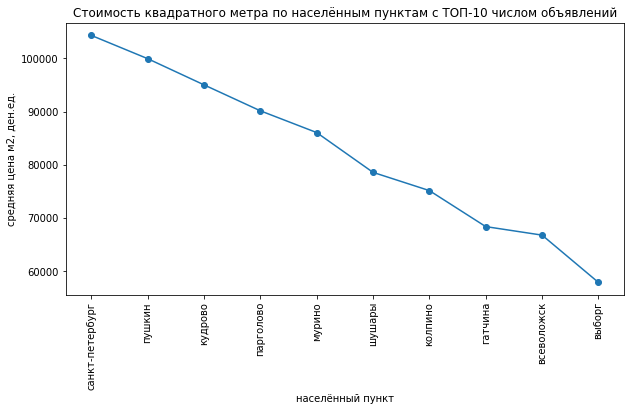

In [74]:
top_10['cost_per_meter_mean'] = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc='mean')
top_10s = top_10.sort_values(by='cost_per_meter_mean', ascending=False).reset_index()

# Построю график
fig, ax = plt.subplots(figsize=(10,5))
ax.set(title = 'Стоимость квадратного метра по населённым пунктам с ТОП-10 числом объявлений',
       xlabel='населённый пункт',
       ylabel='средняя цена м2, ден.ед.')
ax.plot(top_10s['locality_name'], top_10s['cost_per_meter_mean'], 'o-')
plt.xticks(rotation='vertical')
plt.show()

По графику видим, максимальная стоимость квартир у Санкт-Петербурга, дальше стоимость падает по ближайщим городам. 

Построию график по медианной стоимости квартир.


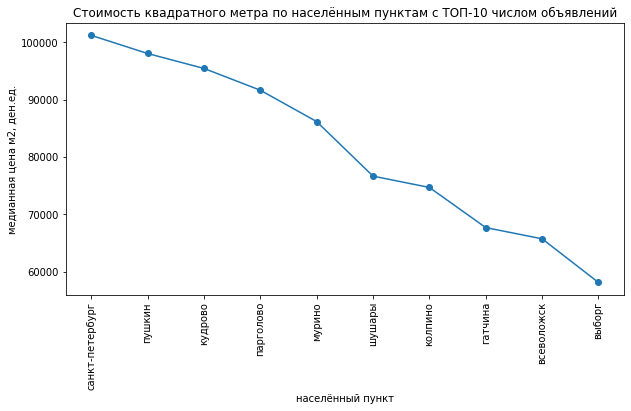

In [75]:
top_10['cost_per_meter_median'] = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc='median')
top_10s = top_10.sort_values(by='cost_per_meter_median', ascending=False).reset_index()

# Построю график
fig, ax = plt.subplots(figsize=(10,5))
ax.set(title = 'Стоимость квадратного метра по населённым пунктам с ТОП-10 числом объявлений',
       xlabel='населённый пункт',
       ylabel='медианная цена м2, ден.ед.')
ax.plot(top_10s['locality_name'], top_10s['cost_per_meter_median'], 'o-')
plt.xticks(rotation='vertical')
plt.show()

По значению медианы выдим,что график не сильно изменился,значит выводы подтвердились. 

Среди нашего списка топ 10 городов по количеству объявлений, самая высокая цена за м2 в Санкт-Петербурге.

На послденем месте г. Выборг, там самая наименьшая цена за м2 среди нашей десятки.


### Напишите общий вывод

 В данном исследовании были узечены данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
    
   
   **Цель** моего исследования состояла в том, чтобы найти факторы, которые больше всего влияют на окончательную стоимость недвижимости. 
   
   Для начала я предобработала данные, полученные на вход,импортировала библиотеки pandas и matplotlib для дальнейшей работы и изучила информацию.

   Стоит отметить, что в исходной таблице 22 столбца и 14 из них содержали пропуски. В некоторых столбцах я заменила пропуски медианным значением или нулем,например, в столбце балконы. Пропуски в столбцах,которые содержат в себе картографические данные трогать не стала, т.к они были импортированы из карты,а это значит, что в том или ином городе нет локаций и мест, которые должны удовлетварят нашим потребностям,т.е либо в городе нет аэропорта, либо в районе нет водоема и парка. 

   Что касается дубликатов,они встретились в наименованиях локации. Для начала я привела к одному значению схожие наименования ,которые сожержат в себе слово поселок,посёлок. Далее исключила дубликаты в наименованиях,т.е сделала данные немного чище. Возможно стоит оптимизировать сбор данных в этих полях.
 
   Чтобы выполнить цель моего ислледования, я добавила некторые столбцы для более точечной работы с моей задачей. 
   В своем анализе я использовала графики и диаграммы. 
   
   **По результату анализа  недостающих данных, стоит обратить внимание коллег по подготовке и сбору данных на заполняемость ячеек, либо на корректность выгрузки данных из программы. Зачастую пропуски в данных могут иметь человеческий характер или же  стать ошибкой при выгрузке данных, поэотому это важно для работы.**

   *Таким образом можно сделать следующий вывод:*
   
   Лидером среди всех городов по количеству объявлений и средней стоимости за м2 является Cанкт-Петрербург. Там средняя стомость за м2 около 114 тыс. рублей. 
   
   Анализ подтвердил, что самыми главными факторами, влияющими на окончательную стоимость являются площадь **жилого** помещения и **общая площадь** помещения. Там коэффициент корреляции равен почти 1, а это значит что при увелечнии одного параментра, увеличивается другой.
   
   Размер кухни и количество в отличие от даты размещения, влияют комнат влияют на конечную стоимость,хоть немного меньше, чем общая площадь. 
   
   Количество этажей и сам этаж не влияют на конечную стоимость, однако люди предпочитаю покупать квартиры не на первом и не на послденем этаже. Квартиры в основном сдаются в 5-9 этажных зданиях, дома старых построек, т.к. новостройки сейчас от 15 этажей.
   
   Также стоит обратить внимание, как влияет удаленность от центра в г. Санкт-Петербург. Конечно, тут прослеживается
  следующая взаимосвязь: квартиры от 1 до 6-8 км находятся в центральном районе, квартиры там гораздо дороже. После 8 км стоимость квартир идет на спад. 
  
  Подводя итог мы имеем, что лучше всего продаются квартиры с 1 или 2 комнатами, в доме 5-ти или 9 ти этажей (с квартирой с 1 по 4 этаж),т.е. квартира в доме старой постройки. 
  
  Общей площадью от 16 м2 до 30 м2. Площадью кухни около 5,5 м², с высотой потолков 2,65 м, стоимостью около 4 млн.руб, расположенной на удалении от центра на расстоянии 12000-16000 метров, до ближайшего парка около 500 метров.В среднем квартиры продаются от 45 дней до полугода.  
    Данное исследование показывает,что крайне мало продается квартир в новостройках,а значит в послдеющие года будет увеличиваться рост продаж квартир в домах новых построек.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.